<a href="https://colab.research.google.com/github/IlyaMolchanovv/MachineLearning/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/Customers.csv")

Вывести первые и последние 10 строк таблицы (head(), tail()).

In [3]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Вывести статистику по значениям признаков.


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Вывести более подробное описание значений признаков (количество непустых
значений, типов столбцов и объема занимаемой памяти).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Визуализация пола клиента. Построить столбиковую диаграмму и круговую
диаграмму, чтобы показать гендерное распределение по набору данных.

In [7]:
import matplotlib.pyplot as plt

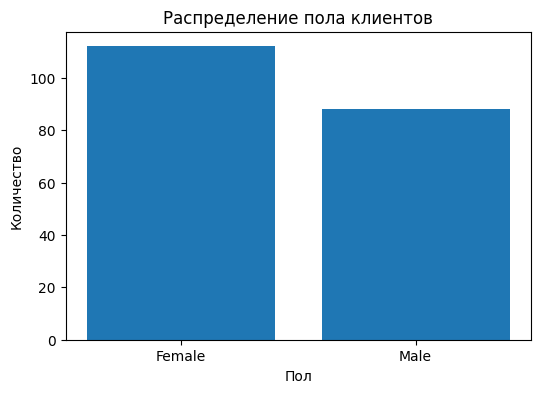

In [10]:
gender_counts = data['Genre'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.title('Распределение пола клиентов')
plt.show()

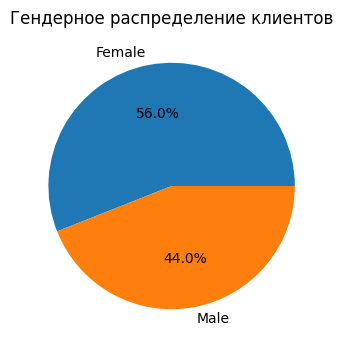

In [11]:
plt.figure(figsize=(6, 4))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Гендерное распределение клиентов')
plt.show()

Визуализация возрастного распределения. Построить гистограмму, для определения
распределения возрастов клиентов. Также построить блочная диаграмма (ящик с усами).

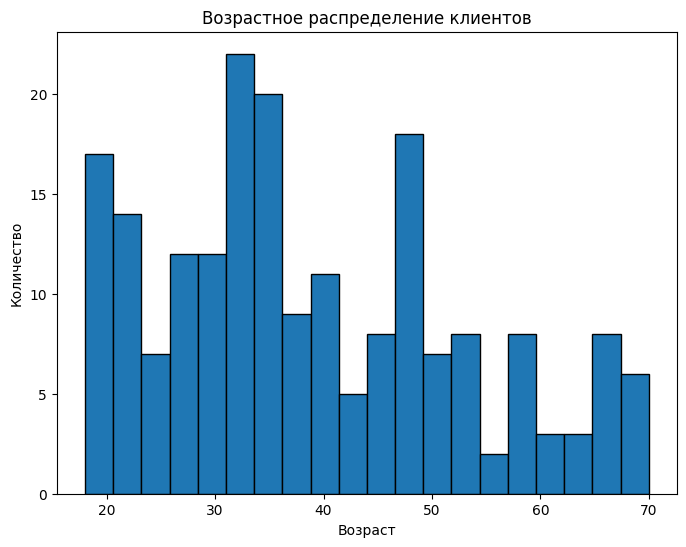

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, edgecolor='k')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Возрастное распределение клиентов')
plt.show()

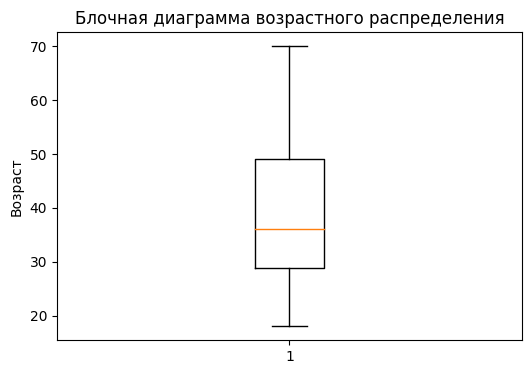

In [13]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['Age'])
plt.ylabel('Возраст')
plt.title('Блочная диаграмма возрастного распределения')
plt.show()

Анализ годового дохода клиентов. Построить гистограмму, затем рассмотреть эти
данные с помощью графика плотности.

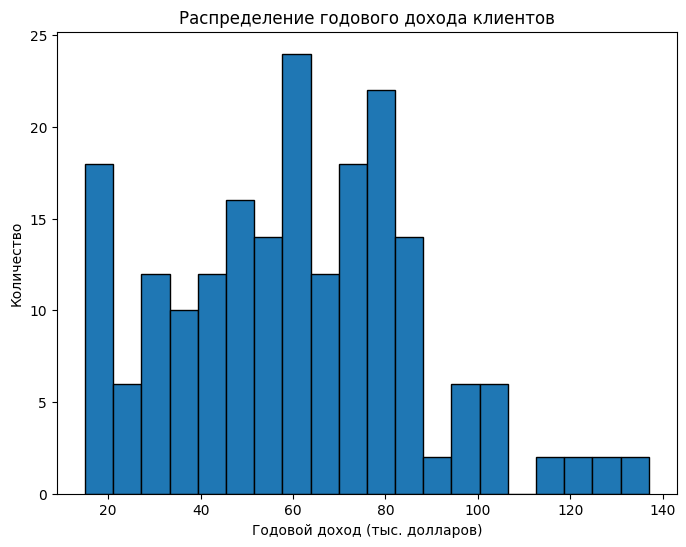

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(data['Annual Income (k$)'], bins=20, edgecolor='k')
plt.xlabel('Годовой доход (тыс. долларов)')
plt.ylabel('Количество')
plt.title('Распределение годового дохода клиентов')
plt.show()

In [16]:
import seaborn as sns

<ipython-input-17-eee1599a2424>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Annual Income (k$)'], shade=True)


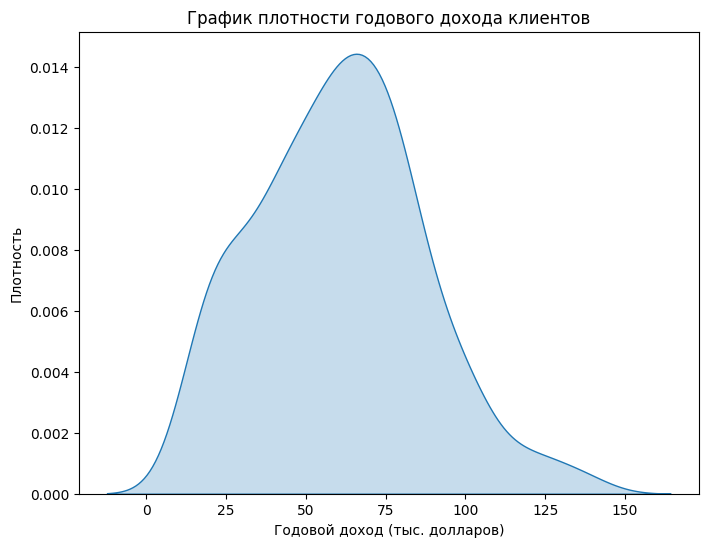

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Annual Income (k$)'], shade=True)
plt.xlabel('Годовой доход (тыс. долларов)')
plt.ylabel('Плотность')
plt.title('График плотности годового дохода клиентов')
plt.show()

Анализ оценки расходов клиентов. Проанализировать расходы, используя различные
графики

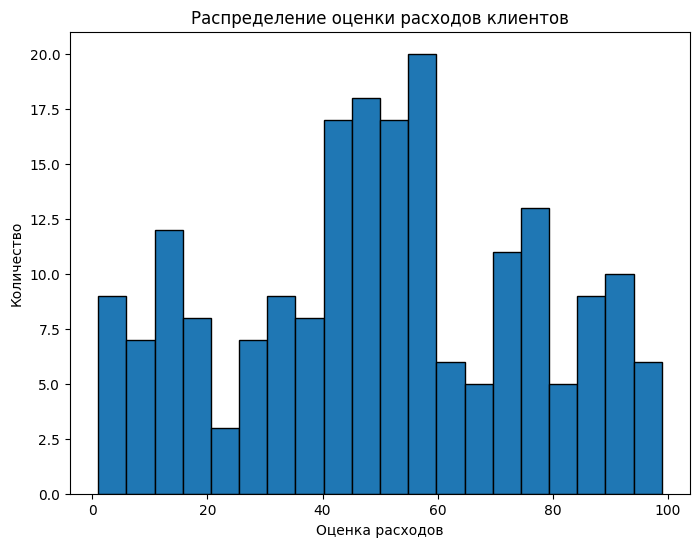

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(data['Spending Score (1-100)'], bins=20, edgecolor='k')
plt.xlabel('Оценка расходов')
plt.ylabel('Количество')
plt.title('Распределение оценки расходов клиентов')
plt.show()

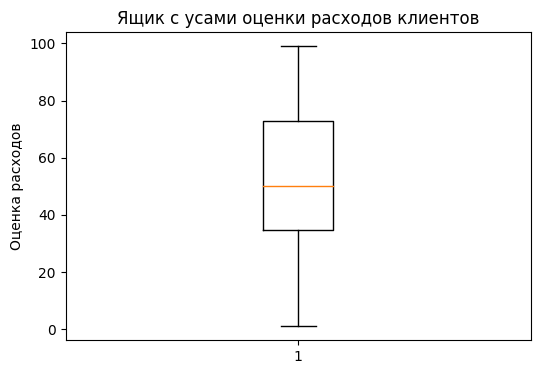

In [20]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['Spending Score (1-100)'])
plt.ylabel('Оценка расходов')
plt.title('Ящик с усами оценки расходов клиентов')
plt.show()

In [21]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

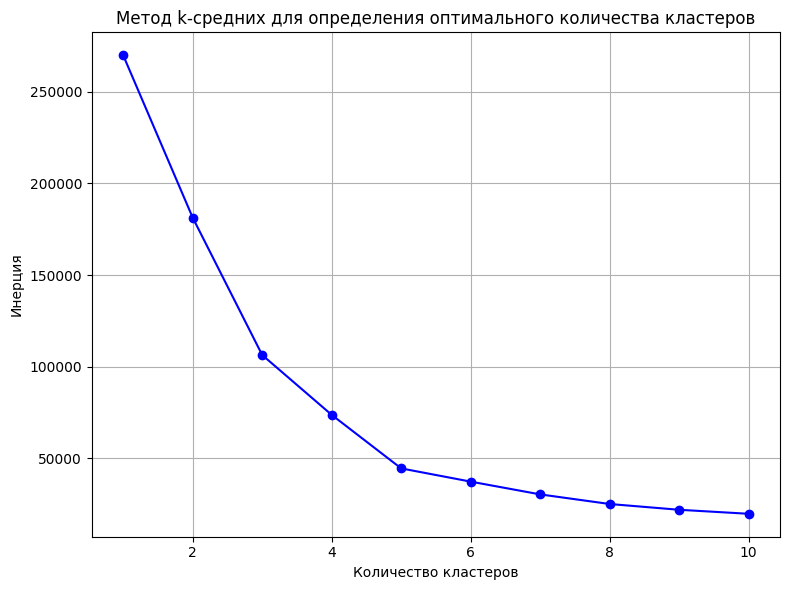

In [28]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод k-средних для определения оптимального количества кластеров')
plt.grid(which='major')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


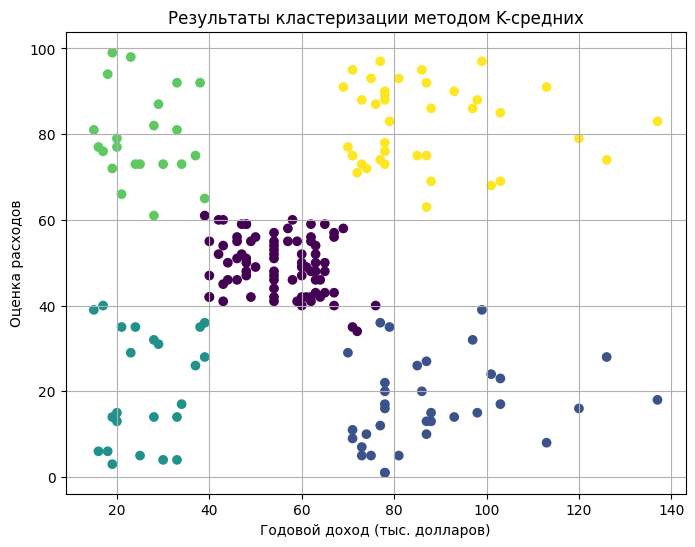

In [30]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Годовой доход (тыс. долларов)')
plt.ylabel('Оценка расходов')
plt.title('Результаты кластеризации методом K-средних')
plt.grid(which='major')
plt.show()